In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import star_utils
from astropy import stats

In [52]:
img_fits = star_utils.load_hi_res()   #load star images
data = star_utils.load_stars()     #load star database

In [53]:
clipped_data = stats.sigma_clip(img_fits['mx3'])  #get stats on image
mid = np.median(clipped_data)
std = np.std(clipped_data - mid)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


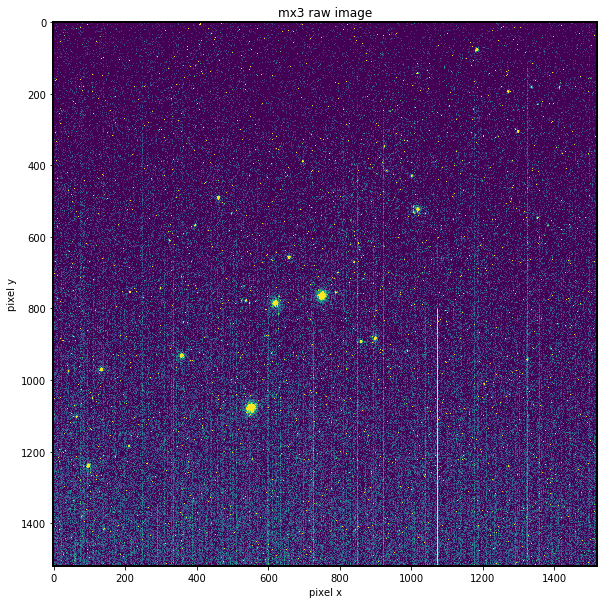

In [55]:
#Plot the raw 'px3' image
img = 'mx3'  #select which image to plot
fig = plt.figure()
fig.set_tight_layout(False)
matplotlib.rcParams['figure.figsize'] = (15, 15)
ax = fig.add_subplot(111)
ax.imshow(img_fits[img],vmin=mid,vmax=mid+5*std)
ax.grid(False)
plt.xlabel('pixel x')
plt.ylabel('pixel y')
plt.title(img+' raw image')
plt.show()

In [61]:
col_list = ['x_img_'+img,
            'y_img_'+img]
stars = star_utils.img_stars(data,img,col_list)
stars[:11]  #show centroid pixel location for first ten stars

,x_img_mx3,y_img_mx3
starname,,
alpha Aps,1146.45,1230.09
alpha Cir,689.88,1230.40
alpha Lup,99.08,1238.50
alpha Mus,900.66,884.38
alpha Vol,1361.25,432.33
alpha1 centaurus,556.54,1221.20
alpha1 crucis,752.18,764.91
beta Aps,1165.42,1439.21
beta Car,1353.03,548.21
